# Pandas Project 2 - Global Youtube Statistics 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('Global YouTube Statistics.csv',encoding='unicode_escape')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
990    False
991    False
992    False
993    False
994    False
Length: 995, dtype: bool

In [8]:
# filling the missing values with mean/median/mode
df['category'].fillna(df['category'].mode()[0],inplace=True)
df.fillna({'Country': df['Country'].mode()[0],'Abbreviation': df['Abbreviation'].mode()[0]}, inplace=True)
df['channel_type'].fillna(df['channel_type'].mode()[0],inplace=True)
df['video_views_rank'].fillna(df['video_views_rank'].mean(),inplace=True)
df['channel_type_rank'].fillna(df['channel_type_rank'].median(),inplace=True)
df['country_rank'].fillna(df['country_rank'].median(),inplace=True)
df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].median(),inplace=True)
df['subscribers_for_last_30_days'].fillna(df['subscribers_for_last_30_days'].median(),inplace=True)
df['created_year'].fillna(df['created_year'].median(),inplace=True)
df['created_month'].fillna(df['created_month'].mode()[0],inplace=True)
df['created_date'].fillna(df['created_date'].median(),inplace=True)

In [9]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [10]:
zero_counts=(df==0).sum()
zero_counts

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  8
category                                     0
Title                                        0
uploads                                     43
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                    118
highest_monthly_earnings                    89
lowest_yearly_earnings                      89
highest_yearly_earnings                     79
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                0
created_date 

In [11]:
# replacing zero values with mean value
df['video views'].replace(0, df['video views'].mean(), inplace=True)
df['uploads'].replace(0, df['uploads'].mean(), inplace=True)
df['lowest_monthly_earnings'].replace(0, df['lowest_monthly_earnings'].mean(), inplace=True)
df['highest_monthly_earnings'].replace(0, df['highest_monthly_earnings'].mean(), inplace=True)
df['lowest_yearly_earnings'].replace(0, df['lowest_yearly_earnings'].mean(), inplace=True)
df['highest_yearly_earnings'].replace(0, df['highest_yearly_earnings'].mean(), inplace=True)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'SET India'),
  Text(1, 0, 'Sony SAB'),
  Text(2, 0, 'Colors TV'),
  Text(3, 0, 'Sony PAL'),
  Text(4, 0, 'Kids TV India Hindi Nursery Rhymes')])

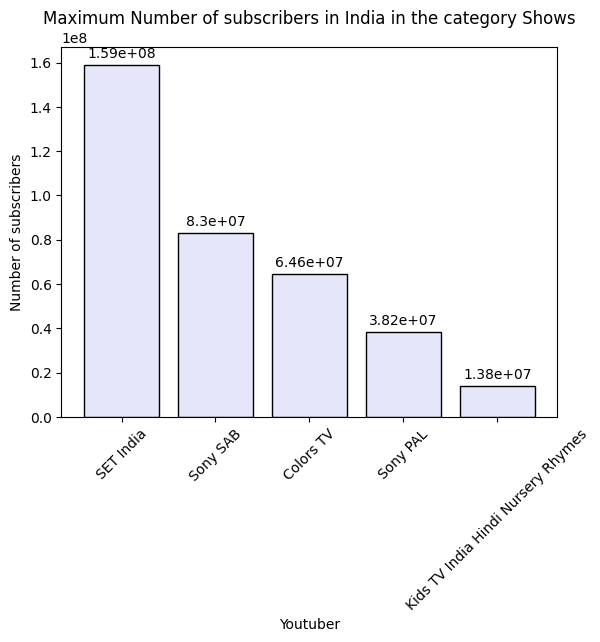

In [12]:
# 1. which Youtube Channel has maximum Number of subscribers in India and in category Shows?
import matplotlib.pyplot as plt
import numpy as np
df['subscribers']=df['subscribers'].astype(int)
a=df.query("Country=='India' and category=='Shows'")
x=plt.bar(a['Youtuber'],a['subscribers'],color='lavender',edgecolor='k')
plt.xlabel('Youtuber')
plt.ylabel('Number of subscribers')
plt.title('Maximum Number of subscribers in India in the category Shows')
plt.bar_label(x,padding=3,fontsize=10)
plt.xticks(rotation=45)

In [15]:
# 2. Name the youtube channel is oldest channel?
old_channels=df.groupby('Youtuber')['created_year'].min().reset_index()
oldest_year=old_channels['created_year'].min()
oldest_channel=old_channels[old_channels['created_year']==oldest_year]
oldest_channel

,Youtuber,created_year
889,YouTube,1970.0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Russia'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Malaysia'),
  Text(6, 0, 'Argentina'),
  Text(7, 0, 'Mexico')])

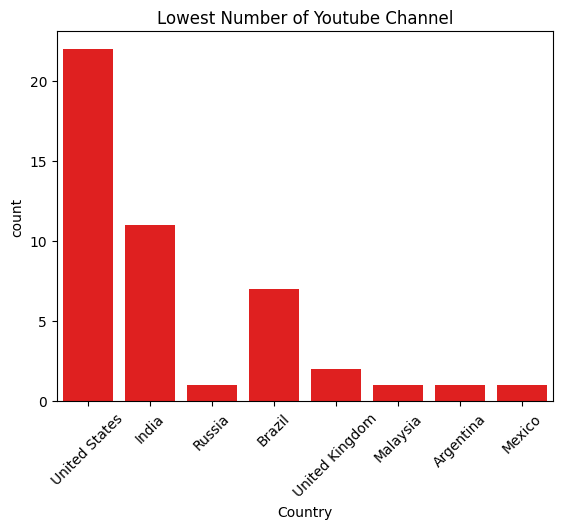

In [13]:
# 3. Which countries have the lowest number of YouTube channels in the category of Film & Animation, and how many are there in each?
import seaborn as sns
import matplotlib.pyplot as plt
a=df.query("category=='Film & Animation'")
b=a['Country']
sns.countplot(x=b,data=a,color='r')
plt.title('Lowest Number of Youtube Channel')
plt.xticks(rotation=45)

In [14]:
# 4. Name the youtube channel that has highest number of video uploads?
df['uploads'] = df['uploads'].astype(int)
a=df.groupby('Youtuber')['uploads'].agg('max').reset_index()
a.max()

Youtuber    ýýýýýýýýýýýýýýýýýýýýýý
uploads                     301308
dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'WWE'),
  Text(1, 0, 'Dude Perfect'),
  Text(2, 0, 'NBA'),
  Text(3, 0, 'FIFA'),
  Text(4, 0, 'How Ridiculous'),
  Text(5, 0, 'UFC - Ultimate Fighting Championship'),
  Text(6, 0, 'FC Barcelona'),
  Text(7, 0, 'F2Freestylers - Ultimate Soccer Skills Channel'),
  Text(8, 0, 'DALLMYD'),
  Text(9, 0, 'gymvirtual'),
  Text(10, 0, 'Natan por Aï¿')])

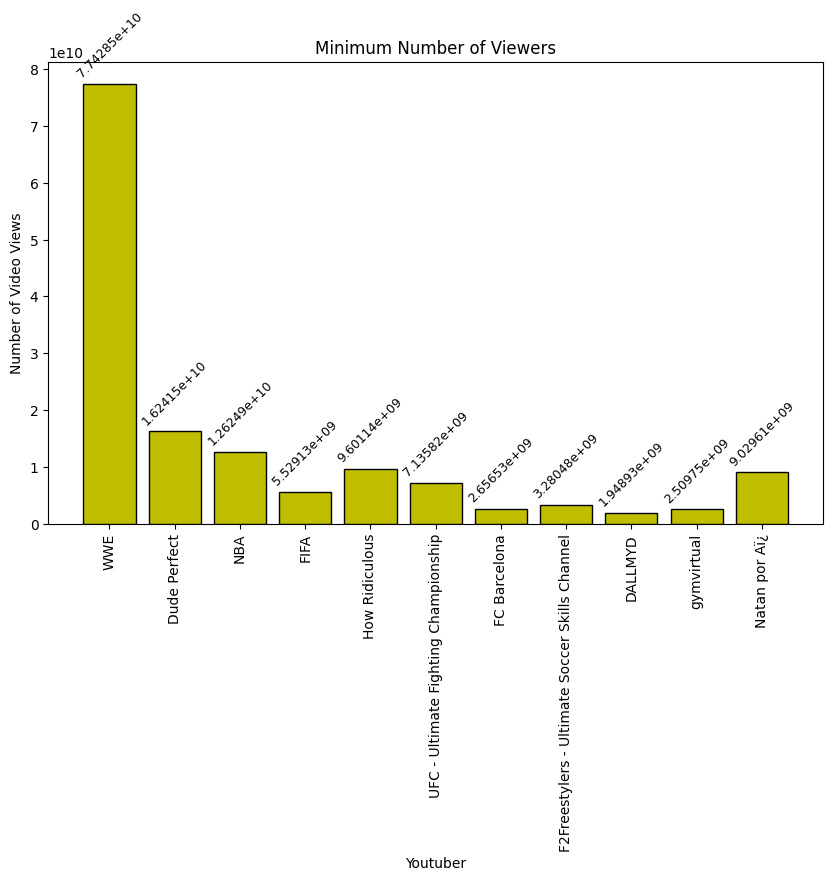

In [16]:
# 5. In which Youtube channels that lowest number of views in category of Sports? 
e=df.query("category=='Sports'")
plt.figure(figsize=(10,6))
x=plt.bar(e['Youtuber'],e['video views'],color='y',edgecolor='k')
plt.xlabel('Youtuber')
plt.ylabel('Number of Video Views')
plt.title('Minimum Number of Viewers')
plt.bar_label(x,padding=3,fontsize=9,rotation=45)
plt.xticks(rotation=90)

In [21]:
# 6. In which country has least number of youtube channel?
country_counts = df['Country'].value_counts()
min_channels = country_counts.min()
least_channels_country = country_counts[country_counts == min_channels]
least_channels_country

Country
China          1
Peru           1
Andorra        1
Bangladesh     1
Finland        1
Morocco        1
Kuwait         1
Malaysia       1
Switzerland    1
Latvia         1
Afghanistan    1
Venezuela      1
Barbados       1
El Salvador    1
Cuba           1
Samoa          1
Name: count, dtype: int64

Text(0.5, 1.0, 'YouTube Channels with Lowest Subscribers')

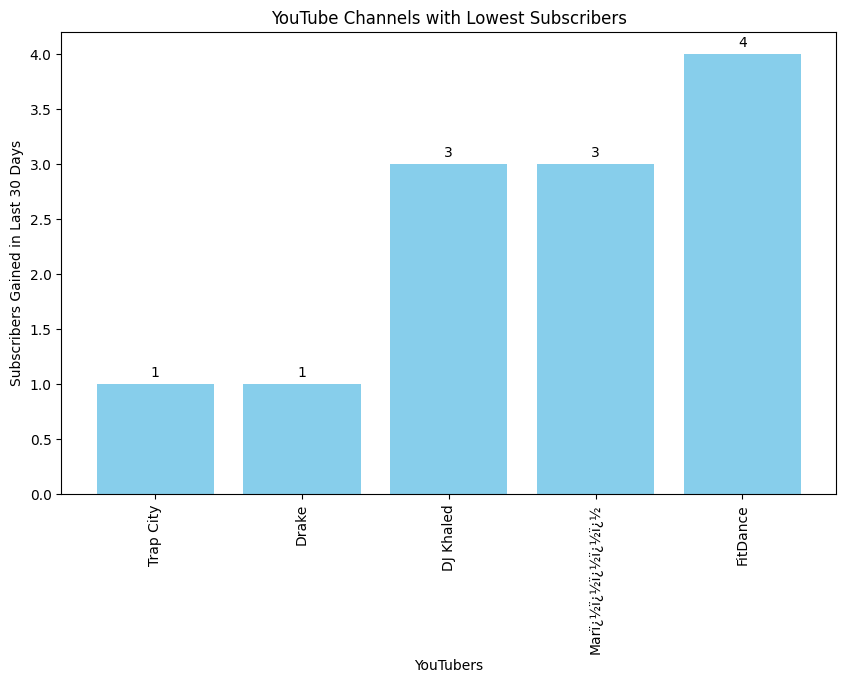

In [18]:
# 7. In which youtube channel has lowest subscribers in last 30 days in category of Music?
df['subscribers_for_last_30_days']=df['subscribers_for_last_30_days'].astype(int)
l=df.query("category=='Music'")
l_sort=l.sort_values(by='subscribers_for_last_30_days').head()
plt.figure(figsize=(10,6))
x=plt.bar(l_sort['Youtuber'],l_sort['subscribers_for_last_30_days'],color='skyblue')
plt.xticks(rotation=90)
plt.bar_label(x,padding=3,fontsize=10)
plt.xlabel("YouTubers")
plt.ylabel("Subscribers Gained in Last 30 Days")
plt.title("YouTube Channels with Lowest Subscribers")

In [67]:
# 8. Which youtube channel has highest number of country rank?
df['country_rank']=df['country_rank'].astype(int)
country_ranks=df.groupby('Youtuber')['country_rank'].min().reset_index()
high_rank=country_ranks['country_rank'].min()
high_rank_youtube=country_ranks[country_ranks['country_rank']==high_rank]
high_rank_youtube

,Youtuber,country_rank
18,ABS-CBN Entertainment,1
31,AboFlah,1
70,Avicii,1
80,BETER Bï¿½ï¿½,1
84,BLACKPINK,1
117,Bounce Patrol - Kids Songs,1
120,Brawl Stars,1
138,Canal KondZilla,1
215,Doc Tops,1
220,Drawblogs,1


Text(0.5, 1.0, 'YouTube Channels with Lowest Monthly Income in the US')

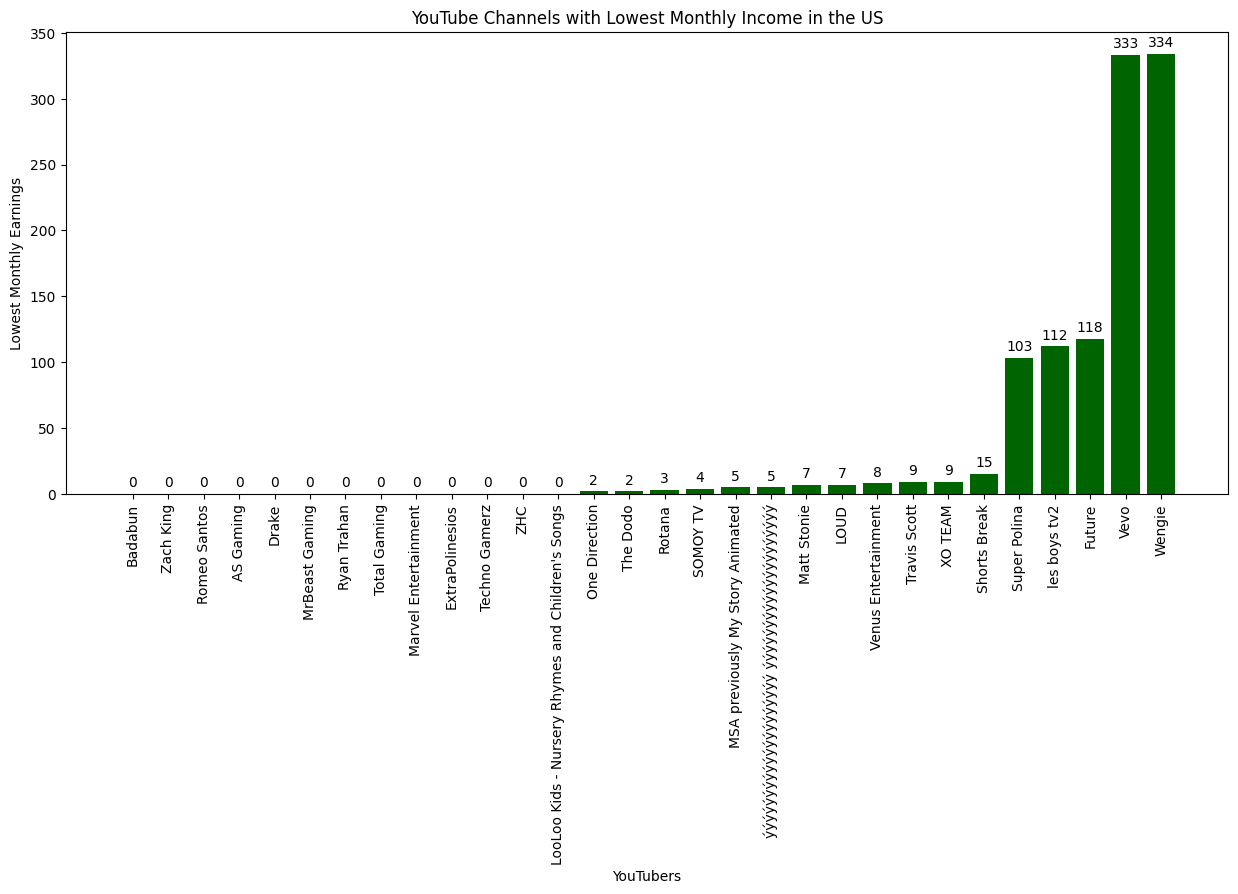

In [61]:
# 9. In which youtube channel has lowest monthly income in US?
df['lowest_monthly_earnings'] = df['lowest_monthly_earnings'].astype(int)
u = df.query("Country == 'United States'")
u_sort = u.sort_values(by='lowest_monthly_earnings').head(30)
plt.figure(figsize=(15, 6))
x = plt.bar(u_sort['Youtuber'], u_sort['lowest_monthly_earnings'], color='darkgreen')
plt.xticks(rotation=90)
plt.bar_label(x, padding=3, fontsize=10)
plt.xlabel("YouTubers")
plt.ylabel("Lowest Monthly Earnings")
plt.title("YouTube Channels with Lowest Monthly Income in the US")

In [20]:
# 10. Total number of youtube channel in channel type film?
f=df.query("category=='Film & Animation'")
f['Youtuber'].count()

46

In [73]:
# 11. In Which month most of youtube channels are created?
month=df['created_month'].value_counts()
max_month=month.max()
max_created=month[month==max_month]
max_created

created_month
Jan    106
Name: count, dtype: int64

In [121]:
# 12. Name youtube channel that has lowest subscribers in last 30 days in country India?
a=df.query("Country=='India'")
lowest_subs=a['subscribers_for_last_30_days'].min()
lowest_sub_channel=a[a['subscribers_for_last_30_days'] == lowest_subs]
lowest_sub_channel['Youtuber']

131    Eros Now Music
Name: Youtuber, dtype: object

In [159]:
# 13. How many total number of subscribers in youtube channel in MrBeast?
a=df.query("Youtuber=='MrBeast'")
a['subscribers'].sum()

166000000

Text(0.5, 1.0, 'YouTube Channels with Highest Yearly Earnings in the UK')

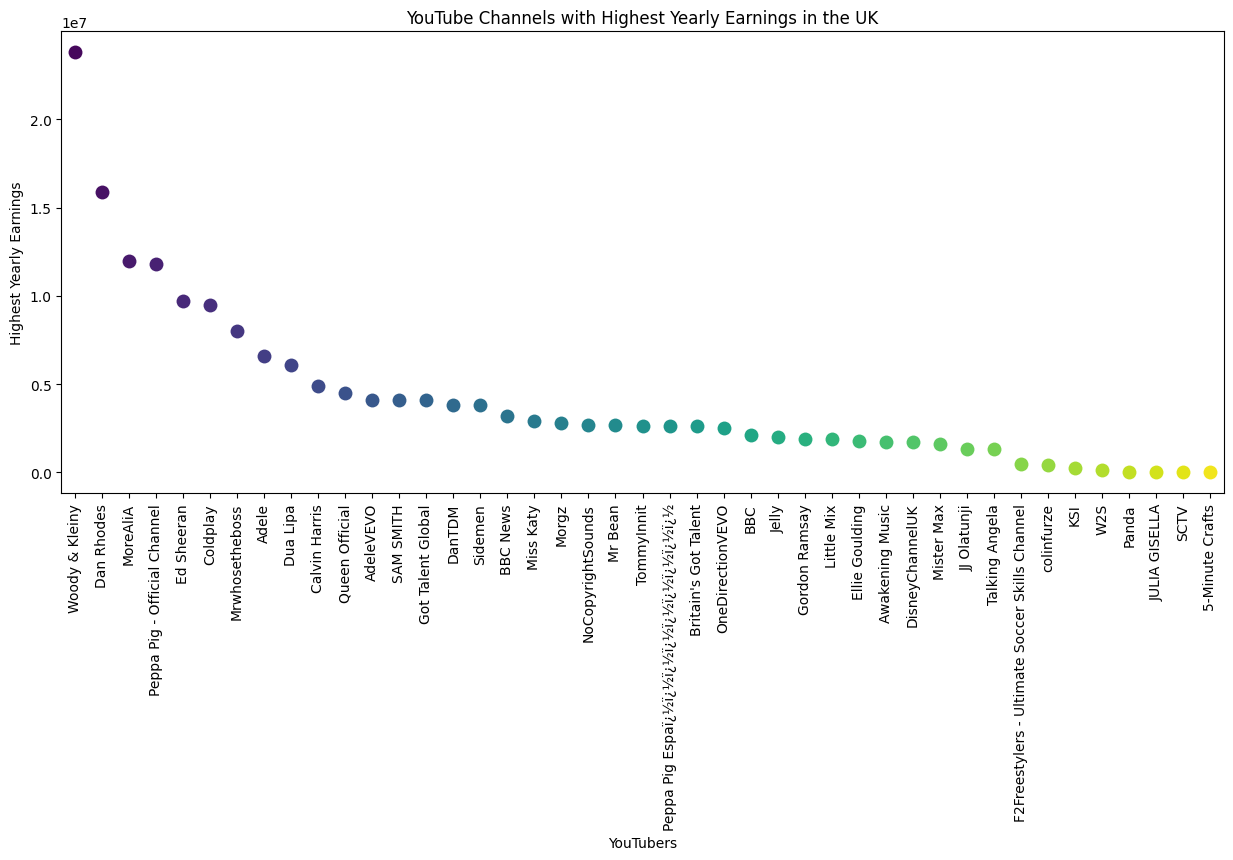

In [17]:
# 14. In which youtube channels has highest yearly earnings in UK?
import seaborn as sns
import matplotlib.pyplot as plt
c=df.query("Country=='United Kingdom'")
c_sorted=c.sort_values(by='highest_yearly_earnings',ascending=False)
plt.figure(figsize=(15, 6))
sns.stripplot(data=c_sorted, x='Youtuber',y='highest_yearly_earnings',palette="viridis",size=10)
plt.xticks(rotation=90)
plt.xlabel("YouTubers")
plt.ylabel("Highest Yearly Earnings")
plt.title("YouTube Channels with Highest Yearly Earnings in the UK")

In [81]:
# 15. Name the country that the youtube channel having lowest rank?
df['country_rank']=df['country_rank'].astype(int)
country_ranks=df.groupby('Country')['country_rank'].max().reset_index()
low_rank=country_ranks['country_rank'].max()
low_rank_youtube=country_ranks[country_ranks['country_rank']==low_rank]
low_rank_youtube

,Country,country_rank
46,United States,7741


In [161]:
# 16. Name the category in which youtube channel 5-Minute Crafts belongs?
a=df.query("Youtuber=='5-Minute Crafts'")
a['category']

16    Howto & Style
Name: category, dtype: object

[Text(0, 3, '1.66e+08'),
 Text(0, 3, '1.19e+08'),
 Text(0, 3, '9.89e+07'),
 Text(0, 3, '9.36e+07'),
 Text(0, 3, '7.5e+07'),
 Text(0, 3, '5.64e+07'),
 Text(0, 3, '4.68e+07'),
 Text(0, 3, '4.36e+07'),
 Text(0, 3, '4.24e+07'),
 Text(0, 3, '4.03e+07')]

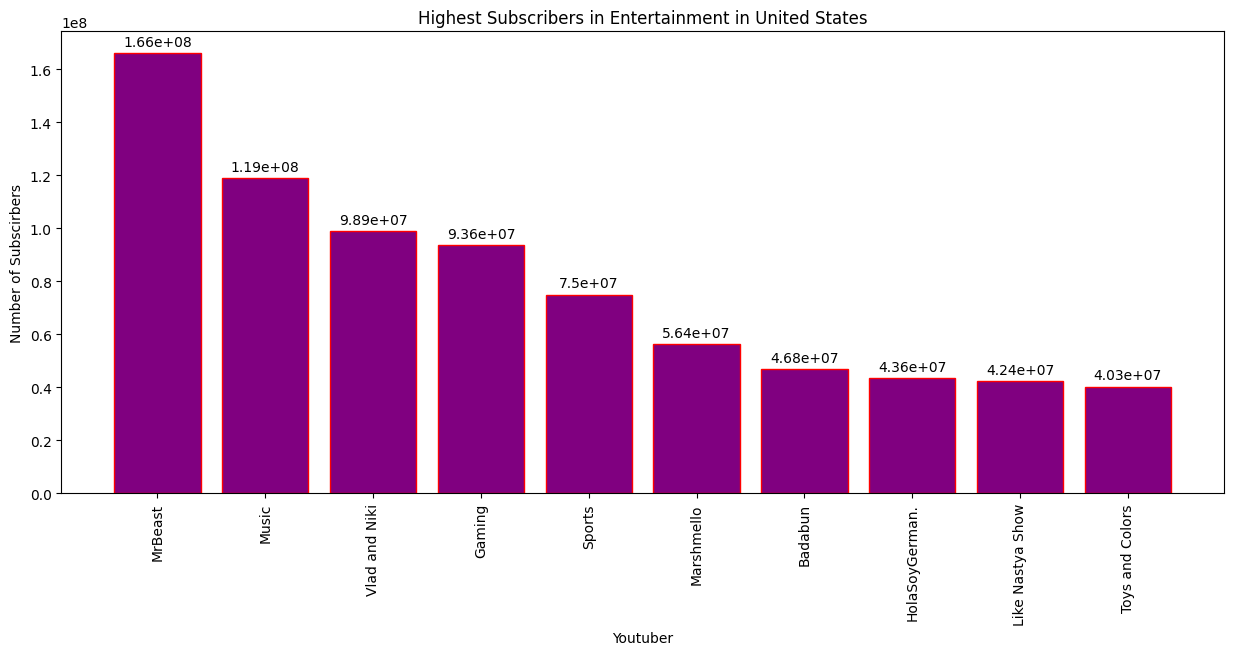

In [97]:
# 17. Which youtube channel has highest subscribers in category of Entertainment in US?
df['subscribers']=df['subscribers'].astype(int)
h=df.query("category=='Entertainment' and Country=='United States'").head(10)
plt.figure(figsize=(15, 6))
x=plt.bar(h['Youtuber'],h['subscribers'],color='purple',edgecolor='r')
plt.xticks(rotation=90)
plt.xlabel("Youtuber")
plt.ylabel("Number of Subscirbers")
plt.title("Highest Subscribers in Entertainment in United States")
plt.bar_label(x,padding=3,fontsize=10)

In [105]:
# 18. How many number of youtube channels in the category Gaming?
a=df.query("category=='Gaming'")
a['Youtuber'].count()

94

In [157]:
# 19. Count the total number of Video Views of youtube channel name SET India?
a=df.query("Youtuber=='SET India'")
a['video views'].sum()

-2147483648.0

In [165]:
# 20. What is the highest yearly earning of youtube channel Cocomelon - Nursery Rhymes ?
a=df.query("Youtuber=='Cocomelon - Nursery Rhymes'")
a['highest_yearly_earnings']

3    94800000.0
Name: highest_yearly_earnings, dtype: float64